In [ ]:
#sentiment analysis program that parses the tweet fetched from twitter
#import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Twitter API credentials
consumerKey = "input  key"
consumerSecretKey = "input key"
accessToken = "input key"
accessTokenSecret = "input key"

In [ ]:
#create the authentication object
authenticate=tweepy.OAuthHandler(consumerKey, consumerSecretKey)

#set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#create the API object while passing in the auth information
api=tweepy.API(authenticate, wait_on_rate_limit = True)



In [ ]:
#extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count=100,lang="en",
                          tweet_mode="extended") 

#print the last 5 tweets from the account
print("show the last 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i+1

show the last 5 recent tweets: 

1) By acting now and funding organizations like @CEPIvaccines, we can help ensure the world never again experiences the hardship of a pandemic. I’m encouraged by the new commitments to groundbreaking R&amp;D made at the Global Pandemic Preparedness Summit. https://t.co/KedWbFzTaC

2) In a crisis, we can always look for the helpers—the people who are putting their lives on the line to aid refugees and victims of the invasion—and support them. I’m proud to support the UN’s refugee agency and urge the global community to do the same. https://t.co/5fkRU6UmCK

3) It’s gut-wrenching to see the people of Ukraine suffering so much. The world feels especially heavy right now, with each day bringing news of families torn apart in Afghanistan, Ukraine, and so many other places.

4) I’m optimistic about our ability to prevent the next pandemic. We have learned so much from COVID, and the innovations have been tremendous. https://t.co/QDfUnEbYeJ

5) The Global Fund 

In [ ]:
#create a dataframe 
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#show the first 5 rows of data
df.head()

,Tweets
0,By acting now and funding organizations like @...
1,"In a crisis, we can always look for the helper..."
2,It’s gut-wrenching to see the people of Ukrain...
3,I’m optimistic about our ability to prevent th...
4,The Global Fund is one of the best investments...


In [ ]:
#create a function to clean the tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+', '',text) #removes @ mentions
  text=re.sub(r'#','', text) #removes # symbols
  text=re.sub(r'RT[\s]+', '',text) #reoves retweets
  text=re.sub(r'https?:\/\/\S+', '',text) #removes the hyper links

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

#show cleaned text
df.head(20)

,Tweets
0,"By acting now and funding organizations like ,..."
1,"In a crisis, we can always look for the helper..."
2,It’s gut-wrenching to see the people of Ukrain...
3,I’m optimistic about our ability to prevent th...
4,The Global Fund is one of the best investments...
5,"At the end of the day, Paul’s most lasting imp..."
6,His work will continue through Partners in Hea...
7,Paul was never happier than when he was caring...
8,"What a devastating loss. Paul is a hero, and I..."
9,It has been over a year since wild polio paral...


In [ ]:
#create a function to creat the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)  

#show the new dataframes 
df.head(20)

,Tweets,Subjectivity,Polarity
0,"By acting now and funding organizations like ,...",0.151515,0.045455
1,"In a crisis, we can always look for the helper...",0.375000,0.266667
2,It’s gut-wrenching to see the people of Ukrain...,0.522143,0.092143
3,I’m optimistic about our ability to prevent th...,0.400000,0.177778
4,The Global Fund is one of the best investments...,0.194444,0.166667
5,"At the end of the day, Paul’s most lasting imp...",0.425000,0.325000
6,His work will continue through Partners in Hea...,0.700000,0.700000
7,Paul was never happier than when he was caring...,0.000000,0.000000
8,"What a devastating loss. Paul is a hero, and I...",0.721429,-0.073377
9,It has been over a year since wild polio paral...,0.633333,0.566667


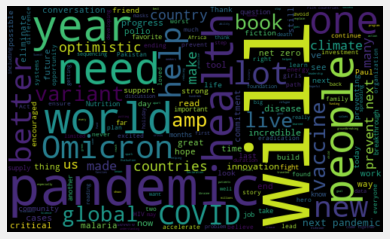

In [ ]:
#word cloud plot
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300,max_font_size=115).generate(allWords)
plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()


In [ ]:
#create a function to compute the positive, neutral and negative analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the dataframe
df.head(20)

,Tweets,Subjectivity,Polarity,Analysis
0,"By acting now and funding organizations like ,...",0.151515,0.045455,Positive
1,"In a crisis, we can always look for the helper...",0.375000,0.266667,Positive
2,It’s gut-wrenching to see the people of Ukrain...,0.522143,0.092143,Positive
3,I’m optimistic about our ability to prevent th...,0.400000,0.177778,Positive
4,The Global Fund is one of the best investments...,0.194444,0.166667,Positive
5,"At the end of the day, Paul’s most lasting imp...",0.425000,0.325000,Positive
6,His work will continue through Partners in Hea...,0.700000,0.700000,Positive
7,Paul was never happier than when he was caring...,0.000000,0.000000,Neutral
8,"What a devastating loss. Paul is a hero, and I...",0.721429,-0.073377,Negative
9,It has been over a year since wild polio paral...,0.633333,0.566667,Positive


In [ ]:
#print all the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

1)By acting now and funding organizations like , we can help ensure the world never again experiences the hardship of a pandemic. I’m encouraged by the new commitments to groundbreaking R&amp;D made at the Global Pandemic Preparedness Summit. 

2)In a crisis, we can always look for the helpers—the people who are putting their lives on the line to aid refugees and victims of the invasion—and support them. I’m proud to support the UN’s refugee agency and urge the global community to do the same. 

3)It’s gut-wrenching to see the people of Ukraine suffering so much. The world feels especially heavy right now, with each day bringing news of families torn apart in Afghanistan, Ukraine, and so many other places.

4)I’m optimistic about our ability to prevent the next pandemic. We have learned so much from COVID, and the innovations have been tremendous. 

5)The Global Fund is one of the best investments in global health. Fully funding its programs for the next 3 years is critical to ending H

In [ ]:
#print all the negative tweets
a=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(a) + ')' +sortedDF['Tweets'][i])
    print()
    a=a+1

1)What a devastating loss. Paul is a hero, and I was fortunate to call him a friend. I have never known anyone who was more passionate about reducing the world’s worst inequities in health—or who did more to live by his values. 

2)One person’s act of bravery can spark dramatic change in hundreds of lives. ’s story is a powerful example. 

3)I wholeheartedly agree with Larry's view that all companies need to be actively preparing for their net zero transition - shareholders, employees, customers, communities, and regulators expect it. 

4)The omicron surge is an unfortunate reminder that the only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. That’s why  is joining  to renew our investment in . 

5)ICYMI here’s a recap of my conversation with . We chatted about this pandemic, how to prevent the next one, and a few things in between. 

6):     So tough question: where do you think SARS-CoV-2 came from? What data do you want to see? An…

7)    People lik

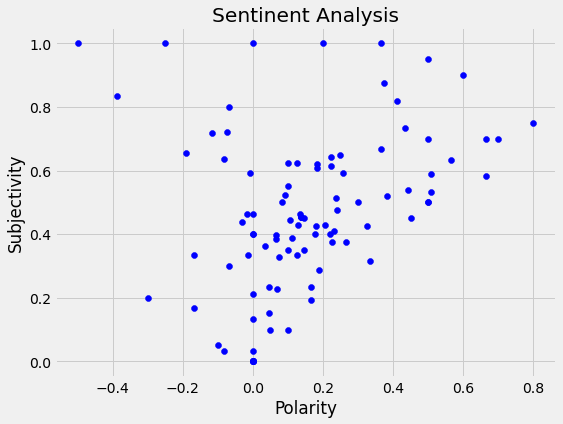

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentinent Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
#get the % of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0]) * 100, 1)

67.0

In [ ]:
#get the % of -ve tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0]/df.shape[0]) * 100, 1)

18.0

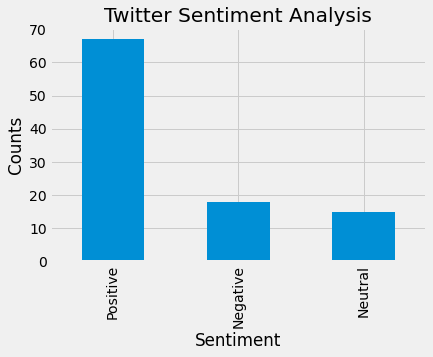

In [ ]:
#plot value count

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
